In [1]:
import os

import scipy as sp
import scipy.misc

import imreg_dft as ird

import imageio

In [12]:
# Load the reference images

fixed=imageio.imread('shadow-mid_2018-11-02_21h-10m-02s_783_original.png')
moving=imageio.imread('shadow-far_2018-11-02_21h-13m-45s_786_original.png')

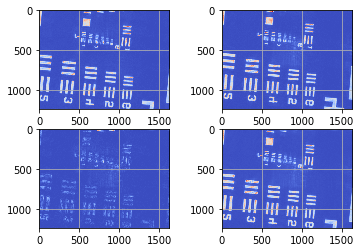

In [13]:
# use the tool from ird to match the reference images
result=ird.similarity(fixed,moving,numiter=3)

# show the output of the results
assert "timg" in result

import matplotlib.pyplot as plt

# in the figure table, top left is the fixed image, top right is the moving image,
# bottom left is the substraction of the fixed and the moving image after trasnformation, 
# and bottom right is moving image after transformation
ird.imshow(fixed,moving,result['timg'])
plt.show()

In [14]:
# show the parameters of the transformation
# tvec: the translation vector
# success: the measure of the quality of the matching (namely, how good the matching is)
# angle: rotation angle
# scale: scaling factor

result

{'tvec': array([28.0097967 ,  0.54816043]),
 'success': 0.1385155063908104,
 'angle': -0.6320461726992903,
 'scale': 1.0121399676586706,
 'Dscale': 0.0010169478555918535,
 'Dangle': 0.027675276752767528,
 'Dt': 0.25,
 'timg': Array([[1170.65429218, 1188.59961226, 1217.08837891, ..., 1090.33645437,
         1119.78386312, 1145.39551961],
        [1415.20815198, 1450.28477063, 1486.75656154, ..., 1307.37415802,
         1343.51664925, 1379.58097308],
        [1702.91083253, 1755.16779464, 1806.89572519, ..., 1546.5870725 ,
         1598.10583967, 1650.43293122],
        ...,
        [ -23.18649398,  179.861609  ,  245.11507465, ...,  178.62785543,
          394.25022582,  239.90790803],
        [ 450.98905746,  138.7870491 ,   36.16951076, ...,  170.81457319,
          116.9115324 ,  114.01167495],
        [ 214.19053767,  107.59672874,  119.77031511, ...,  117.07072662,
          172.5436236 ,  128.37272547]])}

In [15]:
# extract the transformation parameters 
tvec=result["tvec"].round(4)
angle=result["angle"].round(4)
scale=result["scale"].round(4)

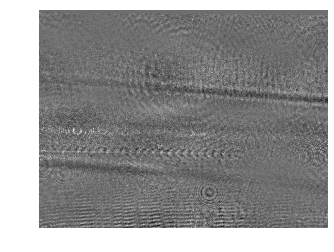

In [17]:

# import the data that one wants to transform (to match)
index=354 # shot number
img1=plt.imread(r'C:\Users\chang95\Documents\LPWFA data\2018-11-01\background suppressed data\shadow far\shadow far_double_corrected_'+str(index)+'.png')

# implement the transformation by using the given parameters
img1_tran=ird.transform_img(img1,tvec=tvec,angle=angle,scale=scale)
# show the result
plt.imshow(img1_tran)
plt.set_cmap('Greys_r')
plt.axis('off')
plt.show()